In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize

https://stackoverflow.com/questions/77190950/runtimewarning-divide-by-zero-encountered-in-log-in-max-likelihood-estimate-pyt

In [2]:
def likelihood(beta, data):
    return - stats.binom.logpmf(k=data, n=1, p=beta[0]).sum()

In [3]:
X = stats.binom(n=1, p=0.6)

In [4]:
np.random.seed(12345)
data = X.rvs(500)

In [5]:
result = optimize.minimize(
    likelihood, x0=[0.5], args=(data,),
    bounds=[(0., 1.)], method='Powell'
)

In [6]:
result

   direc: array([[1.]])
     fun: 341.3715241024539
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 2
  status: 0
 success: True
       x: array([0.57200071])

In [11]:
data.sum() / data.size

0.572

In [7]:
t = np.linspace(0., 1., 100)

In [8]:
@np.vectorize
def L(beta):
    return likelihood([beta], data)

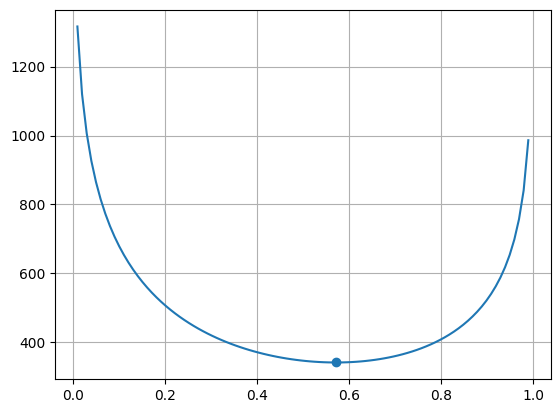

In [9]:
fig, axe = plt.subplots()
axe.plot(t, L(t))
axe.scatter(result.x, L(result.x))
axe.grid()